# About this notebook 

#### Feature: Adoption Fee

This is one of a series of notebooks (one for each feature of interest) that explores the feature for missing data, data characteristics, correlation with the rate of adoption (predictor variable) and other points of interest that might be helpful to know (and deal with) prior to machine learning.

<div class="span5 alert alert-success">
<p> <I> Feature Description: </I> The "Adoption Fee" data represents the amount paid to adopt the pet
 <br>
    <I> Source: </I> https://www.kaggle.com/c/petfinder-adoption-prediction/data  </p>
</div>

<div class="span5 alert alert-success">
<p> <I> Predictor (Adoption Speed) Description: </I> 

Contestants are required to predict this value. The value is determined by how quickly, if at all, a pet is adopted.   
<br> 
The values are determined in the following way:   
0 - Pet was adopted on the same day as it was listed.    
1 - Pet was adopted between 1 and 7 days (1st week) after being listed.    
2 - Pet was adopted between 8 and 30 days (1st month) after being listed.    
3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.    
4 - No adoption after 100 days of being listed.    

</p>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

%cd C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\CapstoneProject2Repository\09 PetfindersData\TrainingData

C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\CapstoneProject2Repository\09 PetfindersData\TrainingData


<div class="span5 alert alert-info">
<p> <B>  Imports and Data Loading: </B>  </p>
</div>

In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Import the csv file

dfi = pd.read_csv('train.csv')
dfi.head(1)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,1,Lil Milo,2,0,26,2,2,0,0,2,...,1,1,0,41326,1a2113010d6048d5410b265347b35c91,0,Milo went missing after a week with her new ad...,375905770,3,3


<div class="span5 alert alert-info">
<p> <B>  Missing Data: </B>   
There are no missing data values, but there are 10 pet with an age >12 years.  These will probably be dropped from the dataset.
</p>
</div>

In [4]:
#Create Adoption Fee Dataframe

dfa = dfi[['Fee']]
dfa.columns = ['adoptionfee']

In [5]:
# Percentage of missing values in each column
pd.DataFrame(
    dfa.isnull().sum() / len(dfa),
    columns=['% Missing Values']
).transpose()

,adoptionfee
% Missing Values,0.0


<div class="span5 alert alert-info">
<p> <B>  Characteristics of the data: </B>  </p>
</div>

In [6]:
#Create a dataframe of fee counts

dfac = dfa['adoptionfee'].value_counts()
dfac = dfac.reset_index()

dfac.columns = ['adoptionfee','feecount']
dfac = dfac.sort_values('adoptionfee')

dfac.head(5)

,adoptionfee,feecount
0,0,12663
9,1,82
66,2,1
15,5,24
27,8,7


In [7]:
print('fee maximum: ' + str(dfac.adoptionfee.max()))

fee maximum: 3000


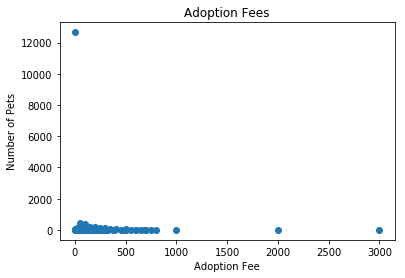

In [8]:
#Scatterplot of the fee data

x = dfac['adoptionfee']
y = dfac['feecount']

plt.scatter(x, y)
plt.title('Adoption Fees')
plt.xlabel('Adoption Fee')
plt.ylabel('Number of Pets')
plt.show()


<div class="span5 alert alert-info">
<p> <B>  Correlation with the Adoption Rate: </B>   
Correlation between age and adoption speed is only 10%
</p>
</div>

In [9]:
#Create a dataframe to calculate correlation
dfaa = dfi[['Fee','AdoptionSpeed']]
dfaa.columns = ['fee','adoptionspeed']

In [10]:
#Calculate pearson correlation between pet age and adoption speed
def pearson_r(x,y):
    corr_mat = np.corrcoef(x,y)

    return corr_mat[0,1]

# Compute Pearson correlation coefficient
r = pearson_r(dfaa.fee,dfaa.adoptionspeed)

# Print the result
print('Correlation value: ' + str(round(r,4)*100) + '%')

Correlation value: -0.4%


<div class="span5 alert alert-info">
<p> <B>  Other Points of Interest: </B>  
</p>
</div>